In [2]:
import selenium
from selenium import webdriver
from urllib.parse import quote
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
%matplotlib inline
import platform
from scipy.stats import *
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows': 
    # 윈도우   
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [212]:
data=pd.read_csv('./final/(0425)그룹화 최종.csv')

In [213]:
day_index=pd.date_range('2006.04.04', '2021.04.08', freq='D')

In [214]:
series = pd.DataFrame(index=day_index, columns=['1kg price'])

In [215]:
series=series.reset_index()

In [216]:
series['index'] = series['index'].astype(str)

In [217]:
series['index'] = series['index'].str.replace('-','.')

In [218]:
series.columns = ['date','1kg price']

In [219]:
series = series.drop(['1kg price'],axis=1)

In [220]:
merge_day = pd.merge(series, data, how='left', on ='date' )

In [221]:
merge_day

,date,qty,1kg price,temp,temp_sc,qty_sc
0,2006.04.04,978.3,4948.71,12.02,-0.853048,-0.652525
1,2006.04.05,4600.7,4447.32,11.90,-0.876107,0.042461
2,2006.04.06,3842.2,4620.74,12.12,-0.833833,-0.103063
3,2006.04.07,4777.3,4060.83,12.18,-0.822304,0.076343
4,2006.04.08,4773.5,4547.00,12.17,-0.824225,0.075614
...,...,...,...,...,...,...
5479,2021.04.04,NaN,NaN,NaN,NaN,NaN
5480,2021.04.05,421.1,5653.34,13.32,-0.603247,-0.759428
5481,2021.04.06,290.7,7392.06,13.35,-0.597483,-0.784446
5482,2021.04.07,399.9,7735.17,13.42,-0.584032,-0.763496


In [222]:
merge_day.to_csv('./final/시계열.csv')

In [223]:
merge_day.isnull().sum()

date           0
qty          882
1kg price    882
temp         882
temp_sc      882
qty_sc       882
dtype: int64

In [224]:
merge_day = merge_day.fillna(method='ffill')

In [225]:
merge_day.index=pd.date_range('2006.04.04', '2021.04.08', freq='D')

In [226]:
merge_day= merge_day.drop(['date'],axis=1)

In [227]:
price = merge_day[['1kg price']]

In [228]:
price

,1kg price
2006-04-04,4948.71
2006-04-05,4447.32
2006-04-06,4620.74
2006-04-07,4060.83
2006-04-08,4547.00
...,...
2021-04-04,4642.59
2021-04-05,5653.34
2021-04-06,7392.06
2021-04-07,7735.17


In [229]:
ratio = 0.75
cut = np.int(len(price)*ratio)

In [230]:
cut

4113

In [231]:
split_date = pd.Timestamp('01-01-2017')

In [232]:
price[:cut]

,1kg price
2006-04-04,4948.71
2006-04-05,4447.32
2006-04-06,4620.74
2006-04-07,4060.83
2006-04-08,4547.00
...,...
2017-07-03,4550.08
2017-07-04,5544.34
2017-07-05,6250.78
2017-07-06,5107.33


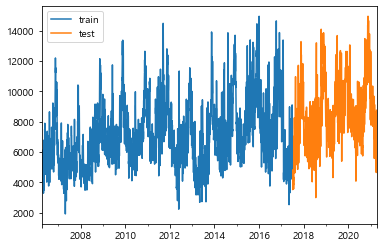

In [233]:
train = price[:cut]
test = price[cut:]

ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])

In [234]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

train_sc

array([[0.23296663],
       [0.19455232],
       [0.207839  ],
       ...,
       [0.33272552],
       [0.24511939],
       [0.15288033]])

In [235]:
train_sc_df = pd.DataFrame(train_sc, columns=['price'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['price'], index=test.index)
train_sc_df.head()

,price
2006-04-04,0.232967
2006-04-05,0.194552
2006-04-06,0.207839
2006-04-07,0.164941
2006-04-08,0.202189


In [236]:
for s in range(1, 11):
    train_sc_df['shift_{}'.format(s)] = train_sc_df['price'].shift(s)
    test_sc_df['shift_{}'.format(s)] = test_sc_df['price'].shift(s)

train_sc_df.head(13)

,price,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10
2006-04-04,0.232967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-04-05,0.194552,0.232967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-04-06,0.207839,0.194552,0.232967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-04-07,0.164941,0.207839,0.194552,0.232967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-04-08,0.202189,0.164941,0.207839,0.194552,0.232967,NaN,NaN,NaN,NaN,NaN,NaN
2006-04-09,0.202189,0.202189,0.164941,0.207839,0.194552,0.232967,NaN,NaN,NaN,NaN,NaN
2006-04-10,0.165248,0.202189,0.202189,0.164941,0.207839,0.194552,0.232967,NaN,NaN,NaN,NaN
2006-04-11,0.180726,0.165248,0.202189,0.202189,0.164941,0.207839,0.194552,0.232967,NaN,NaN,NaN
2006-04-12,0.266805,0.180726,0.165248,0.202189,0.202189,0.164941,0.207839,0.194552,0.232967,NaN,NaN
2006-04-13,0.297112,0.266805,0.180726,0.165248,0.202189,0.202189,0.164941,0.207839,0.194552,0.232967,NaN


In [237]:
X_train = train_sc_df.dropna().drop('price', axis=1)
y_train = train_sc_df.dropna()[['price']]

X_test = test_sc_df.dropna().drop('price', axis=1)
y_test = test_sc_df.dropna()[['price']]

X_train.head()

,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10
2006-04-14,0.297112,0.266805,0.180726,0.165248,0.202189,0.202189,0.164941,0.207839,0.194552,0.232967
2006-04-15,0.221973,0.297112,0.266805,0.180726,0.165248,0.202189,0.202189,0.164941,0.207839,0.194552
2006-04-16,0.205501,0.221973,0.297112,0.266805,0.180726,0.165248,0.202189,0.202189,0.164941,0.207839
2006-04-17,0.205501,0.205501,0.221973,0.297112,0.266805,0.180726,0.165248,0.202189,0.202189,0.164941
2006-04-18,0.179043,0.205501,0.205501,0.221973,0.297112,0.266805,0.180726,0.165248,0.202189,0.202189


In [238]:
print(type(X_train))
X_train = X_train.values
print(type(X_train))
X_test= X_test.values
y_train = y_train.values
y_test = y_test.values
 

print(X_train.shape)
print(y_train.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
(4103, 10)
(4103, 1)


In [239]:
X_train_t = X_train.reshape(X_train.shape[0], 10, 1)
X_test_t = X_test.reshape(X_test.shape[0], 10, 1)

print("최종 DATA")
print(X_train_t.shape)
print(X_train_t)
print(y_train)

최종 DATA
(4103, 10, 1)
[[[0.29711228]
  [0.26680544]
  [0.18072627]
  ...
  [0.207839  ]
  [0.19455232]
  [0.23296663]]

 [[0.22197305]
  [0.29711228]
  [0.26680544]
  ...
  [0.16494116]
  [0.207839  ]
  [0.19455232]]

 [[0.20550146]
  [0.22197305]
  [0.29711228]
  ...
  [0.20218937]
  [0.16494116]
  [0.207839  ]]

 ...

 [[0.27860118]
  [0.20242534]
  [0.19573067]
  ...
  [0.50893606]
  [0.55147075]
  [0.53143424]]

 [[0.33272552]
  [0.27860118]
  [0.20242534]
  ...
  [0.41077997]
  [0.50893606]
  [0.55147075]]

 [[0.24511939]
  [0.33272552]
  [0.27860118]
  ...
  [0.3972351 ]
  [0.41077997]
  [0.50893606]]]
[[0.22197305]
 [0.20550146]
 [0.20550146]
 ...
 [0.33272552]
 [0.24511939]
 [0.15288033]]


In [240]:
from keras.layers import LSTM 
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping

K.clear_session()
    
model = Sequential() # Sequeatial Model 
model.add(LSTM(20, input_shape=(10, 1))) # (timestep, feature) 
model.add(Dense(1)) # output = 1 
model.compile(loss='mean_squared_error', optimizer='adam') 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 20)                1760      
_________________________________________________________________
dense (Dense)                (None, 1)                 21        
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________


In [241]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

model.fit(X_train_t, y_train, epochs=100,
          batch_size=30, verbose=1, callbacks=[early_stop])

Epoch 1/100
137/137 [==============================] - 2s 3ms/step - loss: 0.0317
Epoch 2/100
137/137 [==============================] - 0s 3ms/step - loss: 0.0105
Epoch 3/100
137/137 [==============================] - 0s 3ms/step - loss: 0.0088
Epoch 4/100
137/137 [==============================] - 0s 3ms/step - loss: 0.0071
Epoch 5/100
137/137 [==============================] - 0s 3ms/step - loss: 0.0066
Epoch 6/100
137/137 [==============================] - 0s 3ms/step - loss: 0.0061
Epoch 7/100
137/137 [==============================] - 0s 3ms/step - loss: 0.0059
Epoch 8/100
137/137 [==============================] - 0s 3ms/step - loss: 0.0059
Epoch 9/100
137/137 [==============================] - 0s 3ms/step - loss: 0.0059
Epoch 10/100
137/137 [==============================] - 0s 3ms/step - loss: 0.0053
Epoch 11/100
137/137 [==============================] - 0s 3ms/step - loss: 0.0051
Epoch 12/100
137/137 [==============================] - 0s 3ms/step - loss: 0.0054
Epoch 00012: 

Text(0.5, 1.0, 'Prices vs Predicted price Index: $Y_i$ vs $\\hat{Y}_i$')

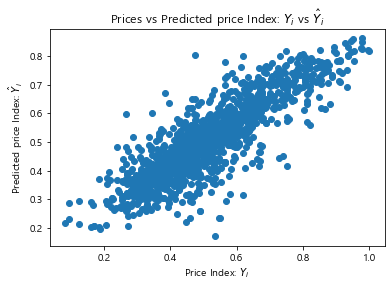

In [242]:
%matplotlib inline
import matplotlib.pyplot as plt


y_pred = model.predict(X_test_t, batch_size=32)
plt.scatter(y_test, y_pred)
plt.xlabel("Price Index: $Y_i$")
plt.ylabel("Predicted price Index: $\hat{Y}_i$")
plt.title("Prices vs Predicted price Index: $Y_i$ vs $\hat{Y}_i$")

In [243]:
len(y_test)

1361

In [244]:
len(y_pred)

1361

In [245]:
y_test

array([[0.18754889],
       [0.18515695],
       [0.12604724],
       ...,
       [0.42016538],
       [0.44645297],
       [0.52435878]])

In [246]:
test_sc_df.dropna()

,price,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10
2017-07-18,0.187549,0.146067,0.156826,0.156826,0.131792,0.172423,0.223877,0.171353,0.152218,0.123690,0.123690
2017-07-19,0.185157,0.187549,0.146067,0.156826,0.156826,0.131792,0.172423,0.223877,0.171353,0.152218,0.123690
2017-07-20,0.126047,0.185157,0.187549,0.146067,0.156826,0.156826,0.131792,0.172423,0.223877,0.171353,0.152218
2017-07-21,0.161867,0.126047,0.185157,0.187549,0.146067,0.156826,0.156826,0.131792,0.172423,0.223877,0.171353
2017-07-22,0.170105,0.161867,0.126047,0.185157,0.187549,0.146067,0.156826,0.156826,0.131792,0.172423,0.223877
...,...,...,...,...,...,...,...,...,...,...,...
2021-04-04,0.209513,0.209513,0.283410,0.365939,0.425564,0.441674,0.464617,0.401650,0.401650,0.429963,0.419664
2021-04-05,0.286952,0.209513,0.209513,0.283410,0.365939,0.425564,0.441674,0.464617,0.401650,0.401650,0.429963
2021-04-06,0.420165,0.286952,0.209513,0.209513,0.283410,0.365939,0.425564,0.441674,0.464617,0.401650,0.401650
2021-04-07,0.446453,0.420165,0.286952,0.209513,0.209513,0.283410,0.365939,0.425564,0.441674,0.464617,0.401650


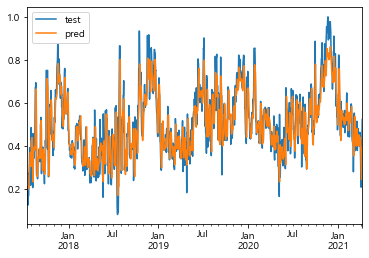

In [247]:
t_df=test_sc_df.dropna()
y_test_df=pd.DataFrame(y_test, columns=['price'], index=t_df.index)
y_pred_df=pd.DataFrame(y_pred, columns=['price'], index=t_df.index)

ax1=y_test_df.plot()
y_pred_df.plot(ax=ax1)
plt.legend(['test','pred'])

In [248]:
score = model.evaluate(X_test_t,y_test, batch_size=30)
score

46/46 [==============================] - 1s 2ms/step - loss: 0.0068


0.00683422340080142

In [249]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('Variance Score : {0:.3f}'.format(r2_score(y_test,y_pred)))

MSE : 0.007, RMSE : 0.083
Variance Score : 0.739
